In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Q1

Consider an experiment where you randomly pick 10 people and write down their birthdays. Let $X$ be the random variable that is 0 when nobody shares a birthday and is 1 when at least two people share a birthday in your sample.

- (a) Describe the sample space of this experiment.

- (b) Simulate this experiment and use this simulation to estimate the probability distribution of random variable $X$. Use at least 10,000 trials.

(a)

The sample space of this experiment is ten Cartesian products of the discrete space of integers: 1, 2, ..., 364, i.e. something like

$$
(\{1,2,..., 364\}, \{1,2,..., 364\}, ..., \{1,2,..., 364\})
$$

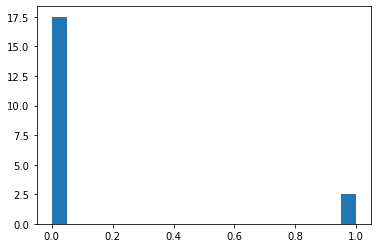

In [23]:
# (b)
# your code might look totally different!
# my solution is, in fact, a little inelegant
from collections import Counter


def simulate_X(num_people):
    
    # get ten random birthdays
    ten_people = np.random.randint(low=1, high=364, size=num_people)
    
    # count the number of people for each day in the array
    count_elements = Counter(ten_people)
    
    # if anything is greater than one, spit out 1
    for ele in count_elements.values():
        if ele > 1:
            return 1
        
    # otherwise return 0
    return 0

num_trials = 10000
results = []
for i in range(num_trials):
    results.append(simulate_X(10))
    
plt.hist(results ,bins=20, density=True)
plt.show()

(c) Let's see how many people we have to pick before it becomes more likely than not to have the same birthday!

In [28]:
np.linspace(10, 30, 5)

array([10., 15., 20., 25., 30.])

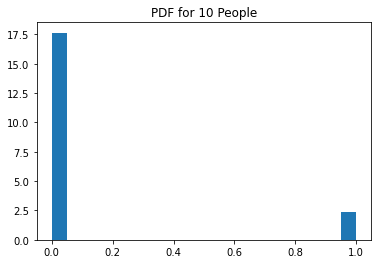

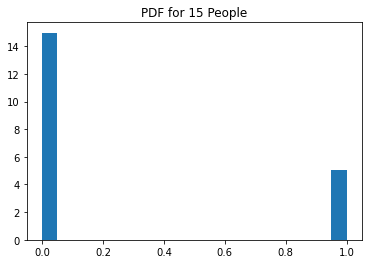

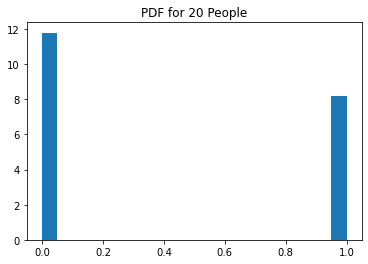

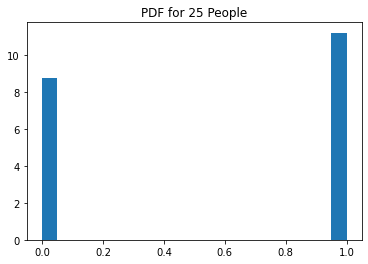

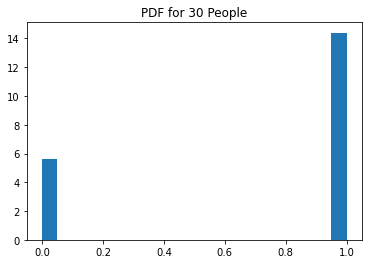

In [29]:
# go from 10 to 30 by 5's
for num_people in np.linspace(10, 30, 5):
    num_people = int(num_people)
    num_trials = 10000
    results = []
    for i in range(num_trials):
        results.append(simulate_X(num_people))
    plt.hist(results ,bins=20, density=True)
    plt.title(f'PDF for {num_people} People')
    plt.show()

## Q2
Consider the olympic athlete data from the January 31st lecture.

- (a) Choose a country and set up a Hypothesis Test to decide whether a random sample of 100 athletes from that country have a mean *weight* different from the population mean.

- (b) Calculate the $p$-value to determine whether to reject or fail to reject the null hypothesis with a significance level of $\alpha = 0.01$.

In [2]:
df_olympics = pd.read_csv('data/athlete_events.csv')
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# population mean
pop_mean = df_olympics['Weight'].mean()
pop_mean

70.70239290053351

In [6]:
# let's pick Canada
df_canada = df_olympics[df_olympics['Team'] == 'Canada'].sample(n=100)
df_canada.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
89282,45248,"Robert Williams ""Bob"" Hamerton",M,25.0,NaN,NaN,Canada,CAN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 400 metres Freestyle,NaN
160904,80745,"Tormod Knutsen ""Tom"" Mobraaten",M,37.0,NaN,NaN,Canada,CAN,1948 Winter,1948,Winter,Sankt Moritz,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN
34213,17628,Katrina Cameron,F,17.0,157.0,38.0,Canada,CAN,2012 Summer,2012,Summer,London,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,NaN
49836,25688,Heather Davis,F,26.0,177.0,77.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Women's Coxed Eights,Bronze
107691,54442,"Sidney ""Sid"" Jensen",M,NaN,168.0,63.0,Canada,CAN,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Team All-Around,NaN


Hypothesis Test for Part (a)

Here the Null hypothesis is that the mean weight for Canadian Olympic athletes is 70 kg, and the alternative is that it is not.

$H_0: \mu_{CAN} = 70$

$H_1: \mu_{CAN} \neq 70$

In [9]:
# part b Let's perform the test!

sample_mean = df_canada['Weight'].mean()
print(f'Mean Weight is {sample_mean}')
std_error = scipy.stats.sem(df_canada['Weight'], nan_policy='omit')

z = (sample_mean - pop_mean) / (std_error)
z

Mean Weight is 69.9620253164557


-0.4563215252559834

In [10]:
# calculate the p-value
p = scipy.stats.norm(0, 1).cdf(z)
p

0.32407939369882915

That p-value is huge! We definitely fail to reject the Null Hypothesis here.

## Q3

Import the Advertising dataset found on Canvas looking at dollars spent by businesses on advertising in various mediums along with the associated sales that quarter. 

- (a) What variables in this dataset appear linearly correlated? Pick a pair that look linearly correlated and calculate the $R^2$ value for a line of best fit using OLS.

- (b) Explain in your own words what the relationship between these two variables using the line of best fit.

In [11]:
df = pd.read_csv('data/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


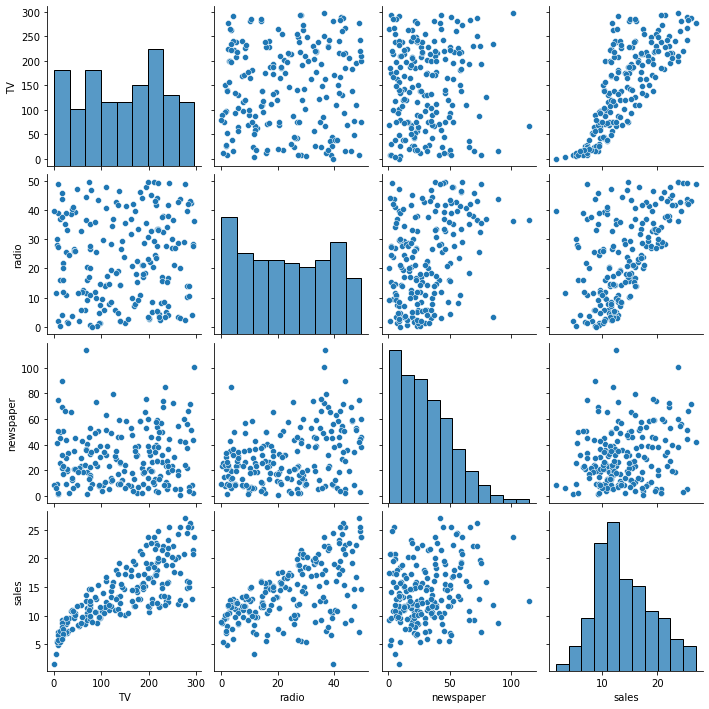

In [19]:
import seaborn as sns
sns.pairplot(df)

Looks like radio and sales are linearly correlated.

In [21]:
model = ols(formula = 'sales ~ radio', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.35e-19
Time:                        18:52:36   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Everytime you increase radio advertising budget by a dollar, you gain 20 cents in sales revenue.

## Q4

Consider the TV and sales variables.

- (a) Are they linearly correlated? Are they correlated in some other way?

- (b) How might we create (or *engineer*) a feature from the TV variable that was linearly correlated with sales?

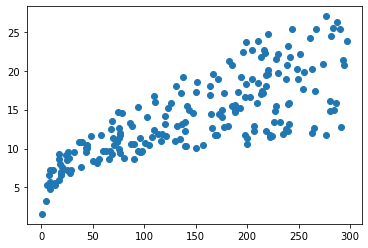

In [21]:
# (a) at first glance it might be linearly correlated. But also maybe slower than linearly? It's not clear!

plt.scatter(x=df['TV'], y=df['sales'])
plt.show()

In [22]:
# let's create a new feature
df['TV_square_root'] = df['TV']**(1/2)

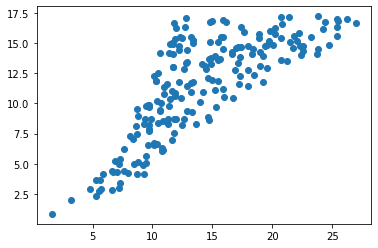

In [23]:
# this looks way more linear!
plt.scatter(x=df['sales'], y=df['TV_square_root'])
plt.show()

In [27]:
# let's compare R^2
model = ols(formula = 'sales ~ TV', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        17:12:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model = ols(formula = 'sales ~ TV_square_root', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     327.1
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           8.39e-44
Time:                        17:12:12   Log-Likelihood:                -516.16
No. Observations:                 200   AIC:                             1036.
Df Residuals:                     198   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6724      0.667      4.004      0.000       1.356       3.989
TV_square_root     0.9954      0.055     18.085      0.000       0.887       1.104
==============================================================================
Omnibus:                        0.759   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.863
Skew:                           0.076   Prob(JB):                        0.649
Kurtosis:                       2.717   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks like the feature we engineered was better!

## Q5

Import the Penguins dataset we looked at in class on January 24th.

- (a) Which other numerical variable predict bill length the best with a linear model? What is the $R^2$ for each of these?

- (b) What if we create a separate linear model for each \textit{species} to predict bill length? Does the overall effectiveness of our model improve? Use $R^2$ values to make your decision.

- (c) Why might models get better if we create a separate linear model for each category? Can a model get "worse" if we do this?

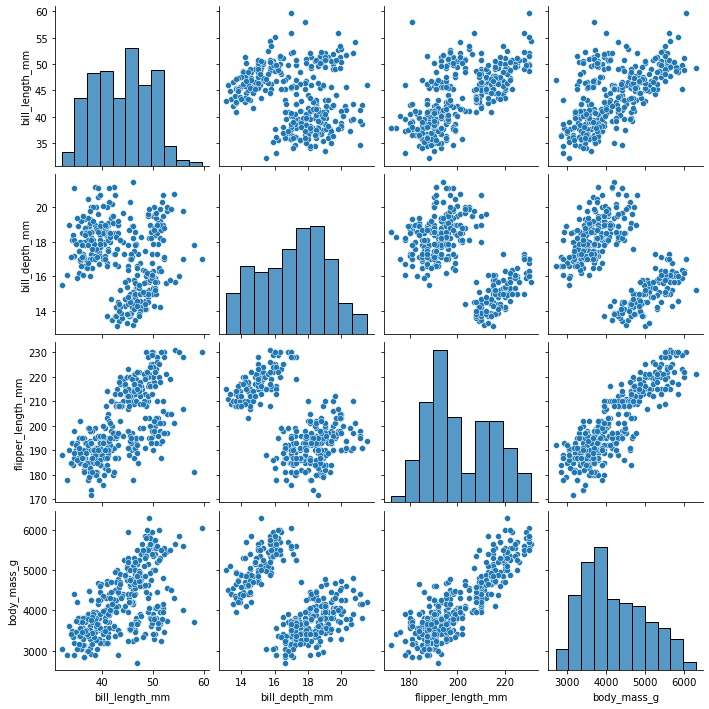

In [5]:
df_penguins = sns.load_dataset('penguins')
sns.pairplot(df_penguins)

In [6]:
# (a)
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Here is a linear model for each numerical variable other than bill length
model = ols(formula = 'bill_length_mm ~ bill_depth_mm', data=df_penguins)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     19.88
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.12e-05
Time:                        18:38:15   Log-Likelihood:                -1055.6
No. Observations:                 342   AIC:                             2115.
Df Residuals:                     340   BIC:                             2123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        55.0674      2.516     21.887      0.000      50.119      60.016
bill_depth_mm    -0.6498      0.146     -4.459      0.000      -0.936      -0.363
==============================================================================
Omnibus:                        8.831   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.238
Skew:                           0.269   Prob(JB):                       0.0268
Kurtosis:                       2.532   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_penguins)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     257.1
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.74e-43
Time:                        18:38:35   Log-Likelihood:                -968.98
No. Observations:                 342   AIC:                             1942.
Df Residuals:                     340   BIC:                             1950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.2649      3.200     -2.270      0.024     -13.559      -0.970
flipper_length_mm     0.2548      0.016     16.034      0.000       0.224       0.286
==============================================================================
Omnibus:                       37.347   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.503
Skew:                           0.791   Prob(JB):                     2.94e-11
Kurtosis:                       3.948   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
model = ols(formula = 'bill_length_mm ~ body_mass_g', data=df_penguins)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     186.4
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           3.81e-34
Time:                        18:38:35   Log-Likelihood:                -990.52
No. Observations:                 342   AIC:                             1985.
Df Residuals:                     340   BIC:                             1993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.8989      1.269     21.194      0.000      24.403      29.395
body_mass_g     0.0041      0.000     13.654      0.000       0.003       0.005
==============================================================================
Omnibus:                       29.171   Durbin-Watson:                   0.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.247
Skew:                           0.762   Prob(JB):                     3.66e-08
Kurtosis:                       3.280   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the $R^2$ it looks like flipper length is the best predictor using a linear model.

In [12]:
#(b)

# Let's predict bill length from flipper length after splitting into the different species populations

df_penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [14]:
df_Adelie = df_penguins[df_penguins['species'] == 'Adelie']
df_Chinstrap = df_penguins[df_penguins['species'] == 'Chinstrap']
df_Gentoo = df_penguins[df_penguins['species'] == 'Gentoo']

In [15]:
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_Adelie)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     17.69
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.47e-05
Time:                        18:43:06   Log-Likelihood:                -353.21
No. Observations:                 151   AIC:                             710.4
Df Residuals:                     149   BIC:                             716.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.5871      5.996      2.266      0.025       1.740      25.435
flipper_length_mm     0.1327      0.032      4.206      0.000       0.070       0.195
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   2.604
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.319
Skew:                          -0.027   Prob(JB):                        0.852
Kurtosis:                       2.781   Cond. No.                     5.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_Chinstrap)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     18.88
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.92e-05
Time:                        18:43:06   Log-Likelihood:                -169.42
No. Observations:                  68   AIC:                             342.8
Df Residuals:                      66   BIC:                             347.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.5934      9.959      0.562      0.576     -14.289      25.476
flipper_length_mm     0.2208      0.051      4.345      0.000       0.119       0.322
==============================================================================
Omnibus:                       18.050   Durbin-Watson:                   2.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.168
Skew:                           0.816   Prob(JB):                     5.15e-09
Kurtosis:                       6.288   Cond. No.                     5.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_Gentoo)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     93.97
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           8.60e-17
Time:                        18:43:07   Log-Likelihood:                -277.12
No. Observations:                 123   AIC:                             558.2
Df Residuals:                     121   BIC:                             563.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -20.7362      7.043     -2.944      0.004     -34.679      -6.793
flipper_length_mm     0.3142      0.032      9.694      0.000       0.250       0.378
==============================================================================
Omnibus:                        4.695   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.237
Skew:                           0.349   Prob(JB):                        0.120
Kurtosis:                       3.582   Cond. No.                     7.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Seems like the $R^2$ only improved marginally for one species. While for the other species the $R^2$ actually decreased.

(c)

Models might get better because different categories can have different linear relationships! Maybe one species follows a certain trend line while another species does not. Models can get worse when we specialize because we have less data; we might overfit or there might not be enough samples to uncover the linear relationship.